In [1]:
from model_functions import *
from synthetic_generation_icassp import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
from metrics import *


import plotly.graph_objects as go
import logging
import sys

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
def plot_granger_graph(params, thresh, title):
    G = nx.from_numpy_array(np.where(np.abs(params)>thresh,np.abs(params), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(params[i,j]))
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,
                        edge_color=edges_colors,
        edge_cmap=plt.cm.get_cmap("magma_r"), width = 1.8)
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title(title)
    plt.show()

def plot_A_and_gt(A,params, thresh):
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    A[[k for k in range(len(A))], [k for k in range(len(A))]] = 0
    G = nx.from_numpy_array(np.where(np.abs(A)>thresh,np.abs(A), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(A[i,j]))
    color_power = np.exp(2*np.array(edges_colors))
    color_power -= np.min(color_power)
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,alpha = color_power/np.max(color_power),
                        edge_color=edges_colors, arrowstyle= "-",
        edge_cmap=plt.cm.get_cmap("magma_r"), width = 1.8)
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title("A*")

    plt.subplot(1,2,2)
    G = nx.from_numpy_array(np.where(np.abs(params)>thresh,np.abs(params), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(params[i,j]))
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,
                        edge_color=edges_colors,
        edge_cmap=plt.cm.get_cmap("magma_r"), width = 1.8)
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title("True graph of Granger causalities")
    plt.show()

def plot_granger_graph_with_gt(params, params_gt, thresh, title):

    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    G = nx.from_numpy_array(np.where(np.abs(params_gt)>thresh,np.abs(params_gt), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(params_gt[i,j]))
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,
                        edge_color=edges_colors,
        edge_cmap=plt.cm.get_cmap("magma_r"), width = 1.8)
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title("Ground Truth")

    plt.subplot(1,2,2)
    G = nx.from_numpy_array(np.where(np.abs(params)>thresh,np.abs(params), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(params[i,j]))
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,
                        edge_color=edges_colors,
        edge_cmap=plt.cm.get_cmap("magma_r"), width = 1.8)
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title(title)
    plt.show()



def plot_undirected_graphs(graphs, thresh, titles): #len(graphs) = 4
    plt.figure(figsize = (12,10))
    for n, A in enumerate(graphs):
        plt.subplot(2,2,n+1)
        A[[k for k in range(len(A))], [k for k in range(len(A))]] = 0
        G = nx.from_numpy_array(np.where(np.abs(A)>thresh,np.abs(A), 0),create_using=nx.DiGraph())
        cmap = plt.cm.plasma
        edges_colors = []
        for (i,j) in list(G.edges):
            edges_colors.append(np.abs(A[i,j]))
        color_power = np.exp(2*np.array(edges_colors))
        color_power -= np.min(color_power)
        nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
        edges = nx.draw_networkx_edges(G, pos = pos,alpha = color_power/np.max(color_power),
                            edge_color=edges_colors, arrowstyle= "-",
            edge_cmap=plt.cm.get_cmap("magma_r"), )
        pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
        pc.set_array(edges_colors)
        plt.colorbar(pc)
        plt.title(titles[n])
    plt.show()

def plot_X(X):
    p, T = X.shape
    fig, axes = plt.subplots(p,1,figsize = (8,p*1))
    for k in range(p):
        axes[k].plot(X[k])
    plt.show()

## Visualization of synthetic data

### Graph visualization

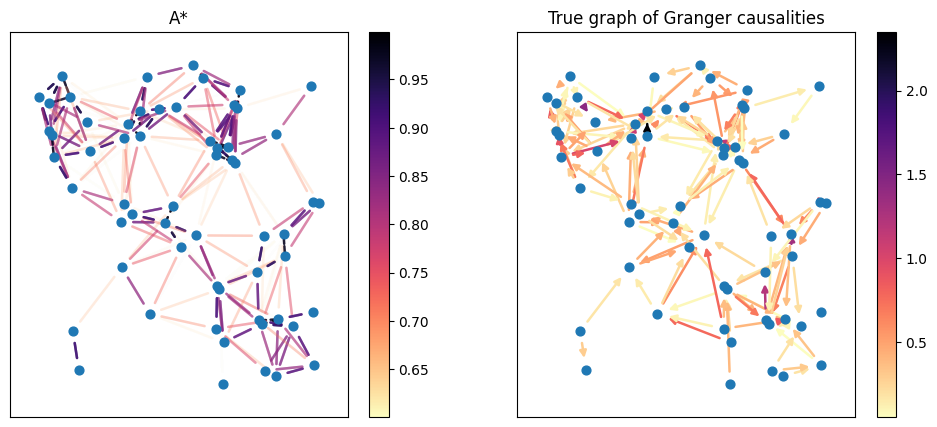

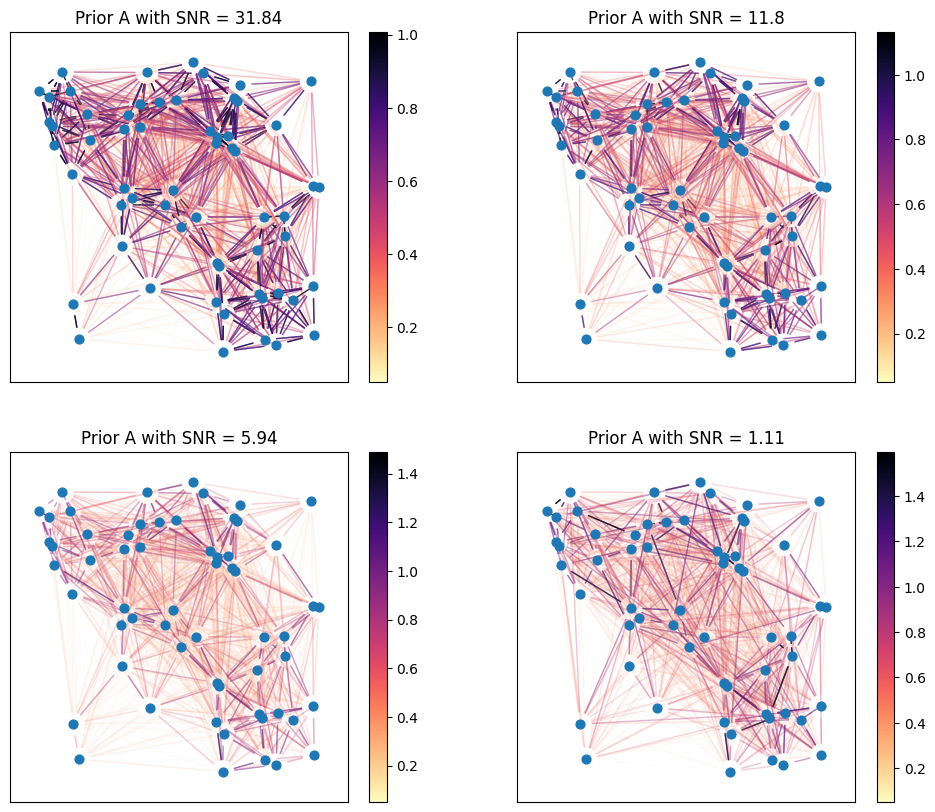

In [23]:
dim = 60
order = 1
thresh = 0.6
thresh_Z = False
delta = 1
mispecified = 0.4
out = 0
size = 80
n_iter = 150
noises_graph = [0.01, 0.1, 0.2, 0.35]
noise_var = 0.1

pos, params, priors, A_star, noises_power = generate_stat_model(dim, order,thresh, sigma_noises=noises_graph, mispecified=mispecified, thresh_Z = thresh_Z, out_of_euclidean = out, sigma = 0.8)
synthetic_X = generate_var_signals(2*size, params, order, dim, noise_var)


SNR = [10*np.log10(np.mean(A_star**2)/noise) for noise in noises_power]


plot_A_and_gt(A_star,params[0], 0.05)

plot_undirected_graphs(priors, 0.05, [f"Prior A with SNR = {round(SNR[i],2)}" for i in range(4)])
   

In [24]:
N_step = 15
noise_level = 0 # chose in {0,1,2,3}
prior = priors[noise_level]
lbdas = [.0001,.0005,0.001,0.004,0.007,0.01,0.02,0.035,0.05,0.065,0.08,0.1]
n_iter = 150


prior_lasso, error_alasso, i_alasso = cross_val_alasso(synthetic_X[:size], dim, order, size, prior+0.05, lbdas, return_errors=True)
lasso_fit_params, error_lasso, i_lasso = cross_val_lasso(synthetic_X[:size], dim, order, size, lbdas, return_errors=True)

lbda = lbdas[i_alasso]
gamma = 8*lbda

fitted_params, Z = alternating_minimization(N_step, prior, lbda, gamma, dim , order, size, synthetic_X, n_iter, history = False)

beta_var = cross_val_lasso(synthetic_X[:size], dim, order, size, [0])[0]
beta_a_lasso, error_var, i = cross_val_alasso(synthetic_X[:size], dim, order, size, np.abs(beta_var)+0.05, lbdas, return_errors=True)


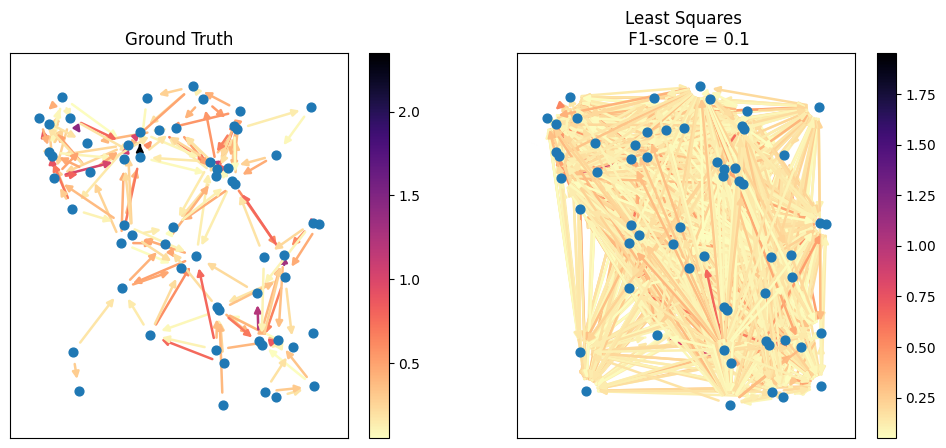

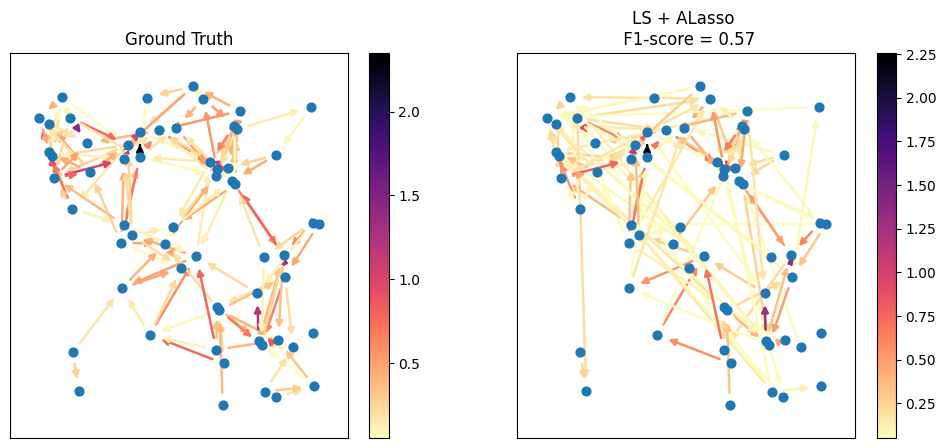

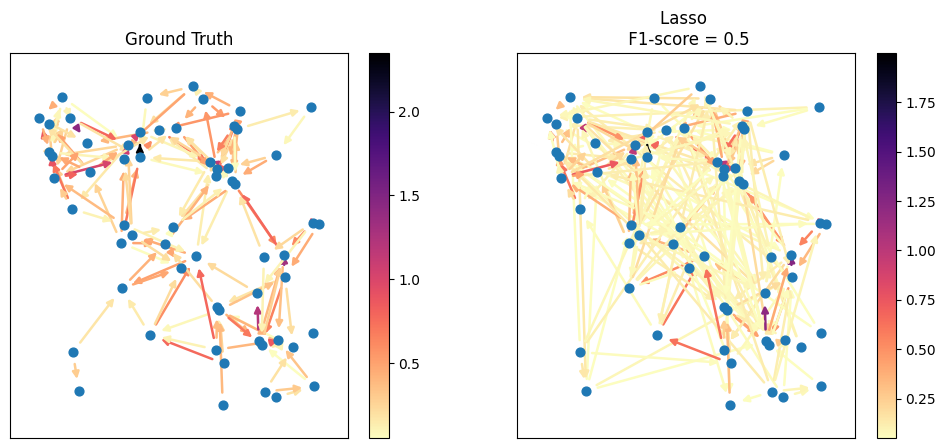

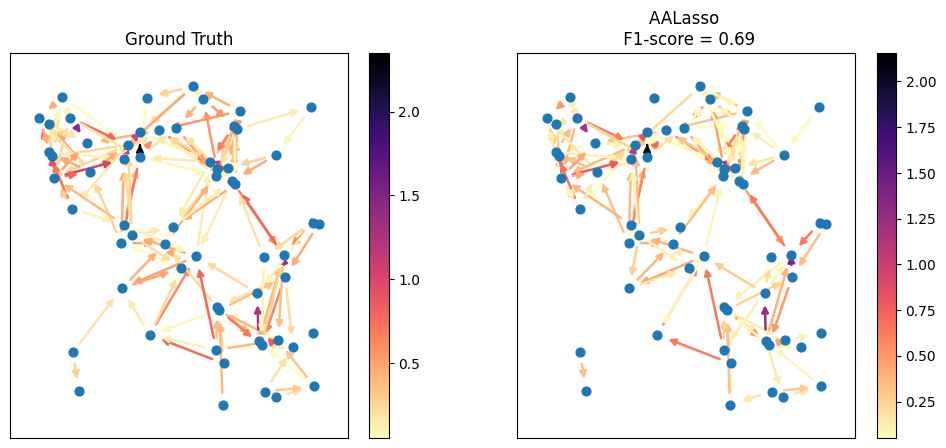

In [25]:
thresh_graph = 0.05

_, _, f1_ls = compute_metrics(beta_var, params[0], thresh_graph)
_, _, f1_ls_alasso = compute_metrics(beta_a_lasso[0], params[0], thresh_graph)
_, _, f1_lasso = compute_metrics(lasso_fit_params[0], params[0], thresh_graph)
_, _, f1_aalasso = compute_metrics(fitted_params, params[0], thresh_graph)

plot_granger_graph_with_gt(beta_var,  params[0], thresh_graph, f'Least Squares \n F1-score = {round(f1_ls,2)}')
plot_granger_graph_with_gt(beta_a_lasso[0],  params[0], thresh_graph, f'LS + ALasso \n F1-score = {round(f1_ls_alasso,2)}')
plot_granger_graph_with_gt(lasso_fit_params[0],  params[0], thresh_graph, f'Lasso \n F1-score = {round(f1_lasso,2)}')
plot_granger_graph_with_gt(fitted_params,  params[0], thresh_graph, f'AALasso \n F1-score = {round(f1_aalasso,2)}')

